# **Introduction**

Exploratory Data Analysis or usually shorten as EDA is a first step that should be done by every data scientist or data analyst before they analyze the data or create a model from the data. In EDA we try to understand the data, such as the variables, its data types, null value, performing descriptive statistics, and many more. EDA is important because it helps us to decide what the next things we need to do before performing data analysis or creating a new model. Using sample superstore dataset I will do the EDA to know which region is having the highest profit, highest sales, which product or category is more proftitable and many more.

**Data Set** : Data set used for this EDA project is the Global Sample Superstore data from Kaggle. The dataset can be downloaded here https://drive.google.com/file/d/1hQBwzFSDPWhD179EOxCNaIjcQTaorVxF/view?usp=sharing


# **Exploratory Data Analysis (EDA)**

**Import libraries and load the data source**

Before doing the EDA it is recommended to import all libraries that will be used for the analysis. WE will use pandas, seaborn, and matplotlib.

##Import Library

In [ ]:
pip install numerize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3156 sha256=10fd0a81aa82625b7a7bdcbec31e4e15e6bb99f5895beaff462f4e6addadc9b8
  Stored in directory: /root/.cache/pip/wheels/87/84/e1/9e30f2e3da6590acb0f1c03a806e2673d2f9e7f5bd2b11589a
Successfully built numerize


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
from google.colab import drive
from urllib.request import urlopen
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.graph_objects as go
from numerize import numerize
import plotly.express as px
import json

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

##Load Data Source

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/SampleSuperstore.csv'  # Update the file path to match your data file
data = pd.read_csv(file_path)

##Read Data

Next, we need to load the data source used for this project.
Using .head() function we can see the top 5 data in the dataset, from this we can now the column that are exists in the dataset.

In [ ]:
#First, like usual we need to load our data into notebook, here I use google colab for the notebook.
#data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Shape Function**

Using .shape function to observe the dimension of he data.
we can see here that the data consists of **9993 rows and 13 columns**

In [ ]:
#shape function, get to know the number of row and column.
data.shape

(9993, 13)

**Info function**

Next we observe the data type of each variable
using .info function. From the data we can see that
there are 3 variables with type float, 2 variables with int type, and 8 variables with type object.
From the result below it also can be seen that there is no variable with null value.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


**Describe Function**

Using function .describe() we can get results of the descriptive statistics from the data.
Describe() function will only return rseult from numerical variables, as we can see here we get statistic summary result from Postal Code,
Sales, Quantity, dsicount, and Profit column.
As we know the result is not suitable for postal code since postal code  is actually not a continues variable. Then further we need to convert the postal code into catagerical variable, we can do it by using .astype function.

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#change postal into object, we can use astype function.
#now we can see that postel code is object
data['Postal Code'] = data['Postal Code'].astype('object')
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
#we also can observe the statistics descriptive for Postal Code column
data_postal = data[['Postal Code']]
data_postal.describe()

,Postal Code
count,9993
unique,631
top,10035
freq,263


**Describe Function**

Using .describe function whe can get the summary statistics from the enitre data frame column by adding include=all
but as we see below the result is not satisfied so we need to separate the statistics summary between categorical and non categorical variable

In [ ]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993.0,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,4,3,1,531,49,631.0,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,10035.0,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5190,9993,915,2000,263.0,3202,6025,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.856670,3.789753,0.156218,28.652464
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.276273,2.225149,0.206456,234.271411
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.662000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## **Analysis of Categorical Variables**

First we will do analysis separately between the categorical and continous variable.

### Statistic Summary

Below are the statistical summary for categorical variable

In [ ]:
#here we will only include categorical variables
#first I will put the categorical varibles into new dataframe called data_categorical
data_categorical = data[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Postal Code']]
data_categorical.describe()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Postal Code
count,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,4,3,1,531,49,4,3,17,631
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,10035
freq,5968,5190,9993,915,2000,3202,6025,1523,263


In [ ]:
#because country has only 1 unique value I can drop it as it will not affect further analysis
data_categorical.drop(['Country'], inplace=True, axis=1)

<ipython-input-15-5a3448f4a31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical.drop(['Country'], inplace=True, axis=1)


In [ ]:
data_categorical

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Postal Code
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,42420
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,42420
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,90036
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,33311
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,33311
...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,Athens,Georgia,South,Technology,Phones,30605
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,33180
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,92627
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,92627


### **Counting unique values for each variable**

Now we can count the number of unique value of each variable using function .value_counts(). From this we can also know what is the highest number for each variable, such as most used shipment mode, what kind of customer do the most transaction etc.

In [ ]:
#for the Ship Mode there are three different values, Standard Class, Second Class, and Fisrt Class
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1944
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
#for Segment variables there are also three distinct value, Consumer, Corporate, and Home Office
data['Segment'].value_counts()

Consumer       5190
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
data['Country'].value_counts()

United States    9993
Name: Country, dtype: int64

In [ ]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [ ]:
#we can also use looping to get the all the count values at once
for kolom in data_categorical:
  datas = data[kolom].value_counts()
  print('==============================\n',datas)

 Standard Class    5968
Second Class      1944
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
 Consumer       5190
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
 New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64
 California              2000
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Ma

### **Visualize the Data**

We can create visualization for each categorical variables so that the insight for each variable can be undestand easier.

Some insight gotten from the visualization are:

1.   Standard class is the most chosen shipment mode and same day is the least used mode
2.   Looking at the customer segment, the most segment did the transaction is consumer segment and the segment did the least transaction is home office
3. Most transaction came from West and the least came from South
4. Most bought product category is office supplies and the least is technology
5. Most bought product sub-category is office supplies and the least is copiers
6. Most customer who did transactions came from California and the least transaction came from Wyoming.

<Axes: xlabel='Category', ylabel='count'>

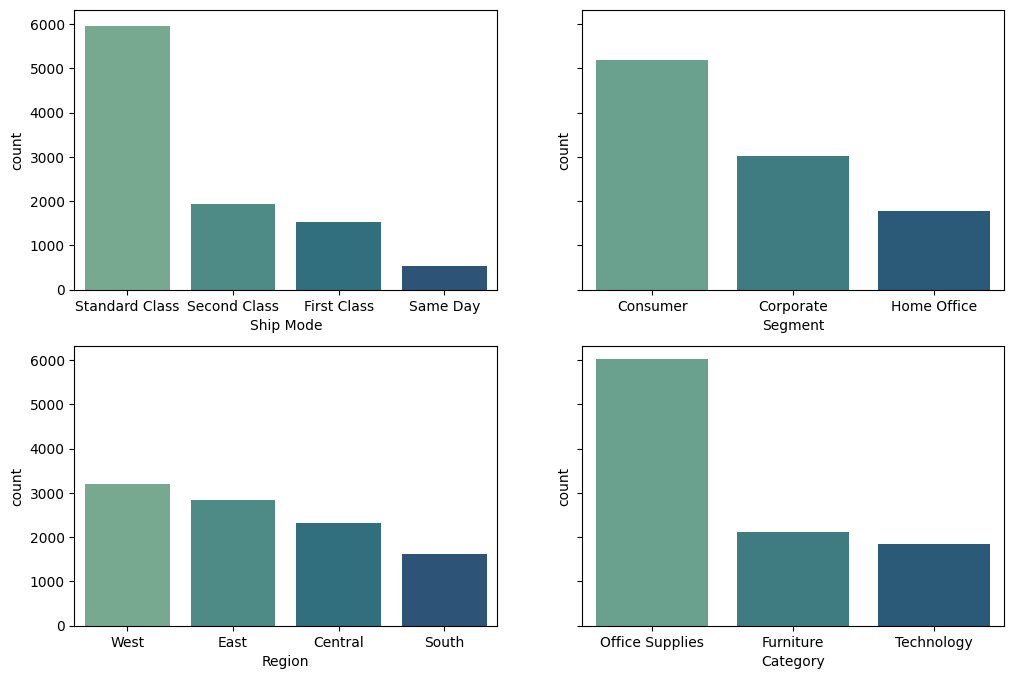

In [ ]:
#We also can create some visualization from each column
fig, axes = plt.subplots(2, 2, figsize= (12,8), sharey = True)

#ship mode
sns.countplot(ax=axes[0][0], x="Ship Mode", data=data_categorical, palette="crest", order = data_categorical['Ship Mode'].value_counts().index)
#axes[0].set_title(bulbasaur.name)

#segment
sns.countplot(ax=axes[0][1], x="Segment", data=data_categorical, palette="crest", order = data_categorical['Segment'].value_counts().index)

#Region
sns.countplot(ax=axes[1][0], x="Region", data=data_categorical, palette="crest", order = data_categorical['Region'].value_counts().index)

#Category
sns.countplot(ax=axes[1][1], x="Category", data=data_categorical, palette="crest", order = data_categorical['Category'].value_counts().index)



<Axes: xlabel='count', ylabel='State'>

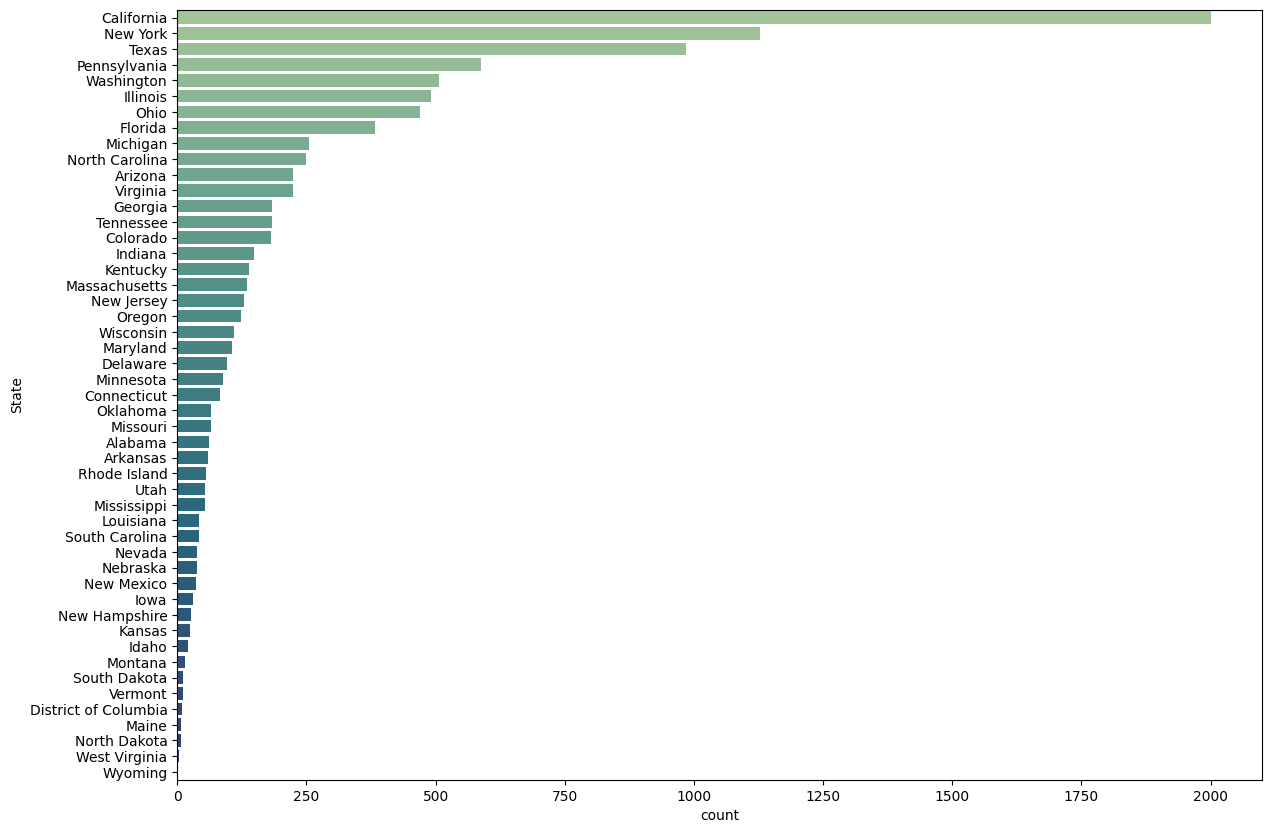

In [ ]:
#State

fig = plt.subplots(figsize= (14,10))
sns.countplot(y="State", data=data_categorical, palette="crest", order = data_categorical['State'].value_counts().index)



<Axes: xlabel='count', ylabel='Sub-Category'>

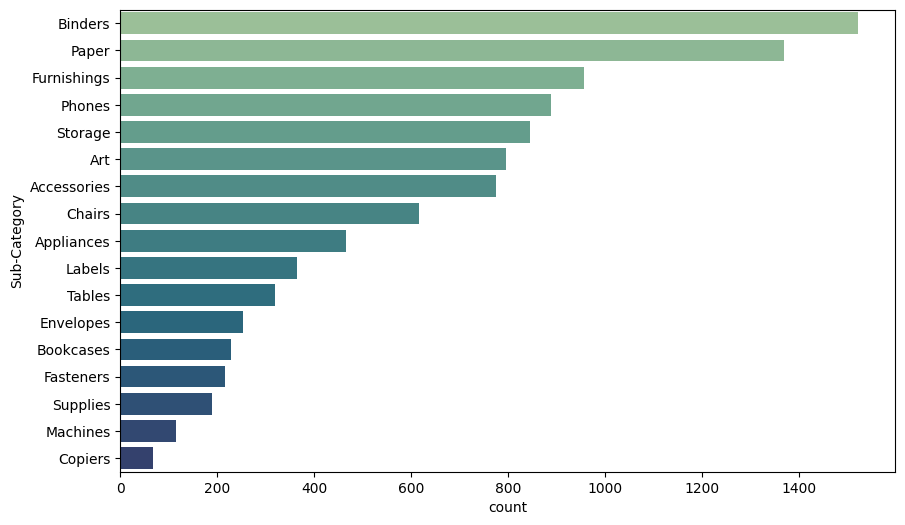

In [ ]:
#Sub-Category
fig = plt.subplots(figsize= (10,6))
sns.countplot(y="Sub-Category", data=data_categorical, palette="crest", order = data_categorical['Sub-Category'].value_counts().index)

### Correlation between categorical variable

For correlation between catgeorical variable I use Cramers V method. The charmer's v method should be use because of following reason:

1. To know the relationship between two variables
2. Variables are categorical
3. Variables have two or more unique values

In [ ]:
#Label Encoding
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in data_categorical.columns :
  data_encoded[i]=label.fit_transform(data_categorical[i])

data_encoded.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Postal Code
0,2,0,194,15,2,0,4,217
1,2,0,194,15,2,0,5,217
2,2,1,266,3,3,1,10,517
3,3,0,153,8,2,0,16,170
4,3,0,153,8,2,1,14,170


In [ ]:
#building of the carmer's v function

from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))


In [ ]:
#building matrix

rows= []
for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Postal Code
Ship Mode,1.00,0.00,0.13,0.01,0.00,0.00,0.00,0.16
Segment,0.00,1.00,0.13,0.01,0.00,0.00,0.00,0.16
City,0.13,0.13,1.00,0.82,0.87,0.05,0.05,1.00
State,0.01,0.01,0.82,1.00,1.00,0.01,0.00,1.00
Region,0.00,0.00,0.87,1.00,1.00,0.00,0.00,1.00
Category,0.00,0.00,0.05,0.01,0.00,1.00,1.00,0.07
Sub-Category,0.00,0.00,0.05,0.00,0.00,1.00,1.00,0.06
Postal Code,0.16,0.16,1.00,1.00,1.00,0.07,0.06,1.00


<ipython-input-28-c3b970a4aa22>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


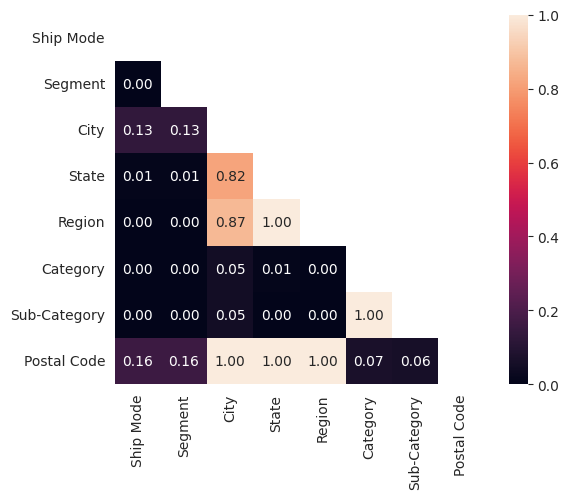

In [ ]:
#create heatmap for the matrix
#import seaborn as sns
#import matplotlib.pyplot as plt
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, annot=True, fmt='.2f')

plt.show()


According to the result, some variables that have same characteristics or exact pattern like city, state, region postal code, category and sub-category have strong correlation. It also can be stated that the dataset is good and valid.
In the other hand other variables with different characteristics have very weak correlation.

## **Analysis of Continous Variable**

Next we will do the analysis for continous variable

In [ ]:
#first we can make a new variable to group the numerical data, here i create a new variable named num_variable
num_variable = ['Sales', 'Quantity', 'Discount', 'Profit']

### **Descriptive statistics**



In [ ]:
#use describe function to do the descriptive statistics
num_variable = data[['Sales', 'Quantity', 'Discount', 'Profit']]
num_variable.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.856670,3.789753,0.156218,28.652464
std,623.276273,2.225149,0.206456,234.271411
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728000
50%,54.480000,3.000000,0.200000,8.662000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


The statistics descriptive above can be explained below:

**Sales**

1. The average sales value is USD 229.85
2. The standard deviation of the sales value is USD 623.27, meaning that the variation of the data is quite high
3. The minimum sales value is USD 0,44 it indicates that they are several transaction that are very low, business can analyze which product that has low transaction and define some promotion program. In the other hand the maximum sales amount recorded is USD 22638, it is quite high, using this finding business can analyze what customer doing this high transaction and attract them to stay loyal with the company, business also can analyze which product that has this high value of sales and improve the transaction to gain more profit.
4. The 25% percentile of sales is USD 17.28, it means that 1/4 of sales has maximum value of USD 17,28.
5. The 50% percentile is USD 54.48 meaning that half of the sales have no value more than USD 54.48, it is a low value.
6. The 75% of sales is USD 209, this value indicates that 75% of sales transaction is no more than USD 209, this value also quite low. It means that most transactions have very low total amount.


**Quantity**
1. The average quantity is 3.7, indicating that customers tend to buy few items per transaction.
2. The standard deviation is 2.2, it is not too different with the mean, indicating that the data has low variation
3. The minimum qty bought by customer is 1 and the maximum is 14, indicating that some transaction is just single item and in the other hand it is a transaction with high quanity. Targeting and understanding the characteristics and preferences of customers who make larger purchases can help increase sales and customer satisfaction.
4. The 25% percentile is 2, meaning that 1/4 transaction has item less than 2. The 50% is 3, meaning that half transaction do not have more than 5 items per transaction. While the 75% is 5, it means most transactions still have very low quantity.

**Discount**
1. The average discount is 0.15 and its standard deviation is 0.2
2. The 25%  is 0 means that 1/4 transaction data do not have any discount applied. 50% and 75% precentile is 0.2 means that most transactions have discount less than 20%. It means that bsuiness do not give many discounts. Business my analyze whether discount will affect on sales and profit.

**Profit**
1. The average profit per transaction is USD 28.65 with standard deviation value USD 234, since the difference between standard deviation and mean is relatively high, it indicates that data has high variation of profit value
2. The 25 percentile is USD 1.7, 50 perecntile is USD 8.6, and 75 percentile is USD 29, it indicates that 75% of the transaction has profit less than USD 29, this value is still quite low.
3. The highest profit recorded is USD 8399, it indicates that certain transaction is highly profitable, in the other hand the minimum value is USD -6599 it is also indicate that certain transaction has a very high loss.


### **Visualization**

#### **Boxplot**


In [ ]:
numerical_col = num_variable.columns
print(numerical_col)

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


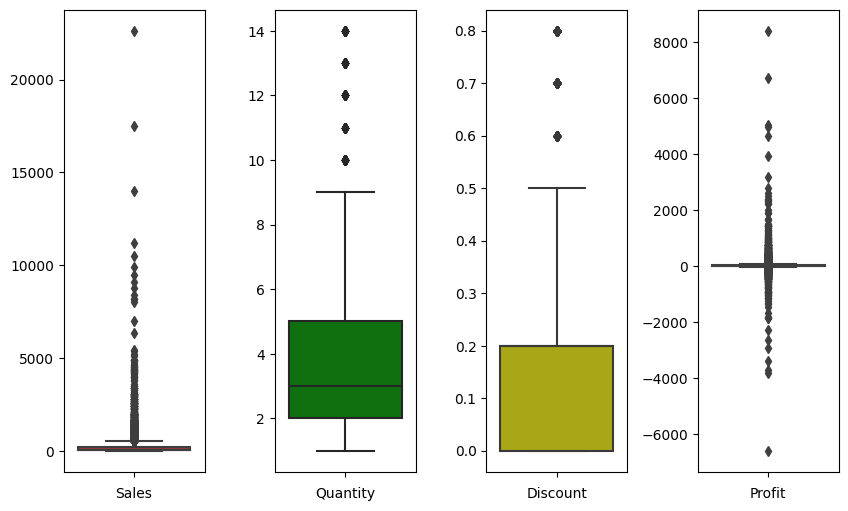

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

# Add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# Define the variables for each subplot
variables = numerical_col
colors = ['brown', 'g', 'y', None]
x_labels = numerical_col

# Draw boxplots for each variable in its corresponding subplot
for i, variable in enumerate(variables):
    sns.boxplot(data=num_variable[variable], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(x_labels[i])

    # Remove x-tick labels
    ax[i].set_xticklabels([])

plt.show()

From the bloxpot above I can see the outlier of each variables. Outliers refer to data points that deviate significantly from the majority of the observations, either by being exceptionally large or small.
Quantity and discount do not have many ouliers, in the other hand Sales and profit have a lot of outliers.

Data points that called as outliers are fall outside the min and max line, the min and max line have below formula:

maximum: Q3 + 1.5*IQR

minimum: Q1 -1.5*IQR


In [ ]:
#count the total outliers for each variable
Q1 = num_variable.quantile(0.25)
Q3 = num_variable.quantile(0.75)
IQR = Q3-Q1

max_value = Q3+1.5*IQR
min_value = Q1-1.5*IQR

# Counting the total number of outliers
outliers = ((num_variable[numerical_col] < min_value) | (num_variable[numerical_col] > max_value)).sum()
total_outliers = outliers.sum()

print("Total outliers for each variable:")
print(outliers)
print("Total outliers:", total_outliers)

Total outliers for each variable:
Sales       1167
Quantity     170
Discount     856
Profit      1880
dtype: int64
Total outliers: 4073


#### Histogram

Histogram is a type of chart that can be used to visualize distribution of the data.

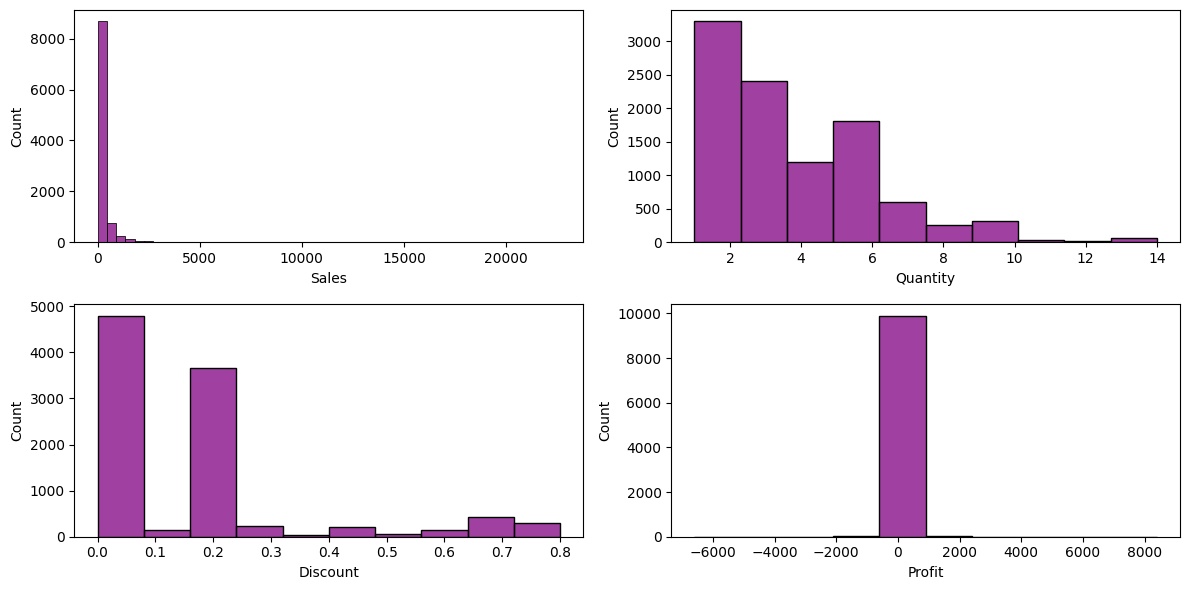

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

variables = numerical_col
bins = [50, 10, 10, 10]

for i in range(2):
    for j in range(2):
        sns.histplot(ax=axes[i][j], data=num_variable[variables[i*2 + j]], bins=bins[i*2 + j], color = 'purple')

plt.tight_layout()
plt.show()

#### Density Plot

Beside histogram we can also add density plot. Density plot is the smooth version of histogram. In the density plot the y axis not represents the count number, but it shows the propability per unit on the x axis.

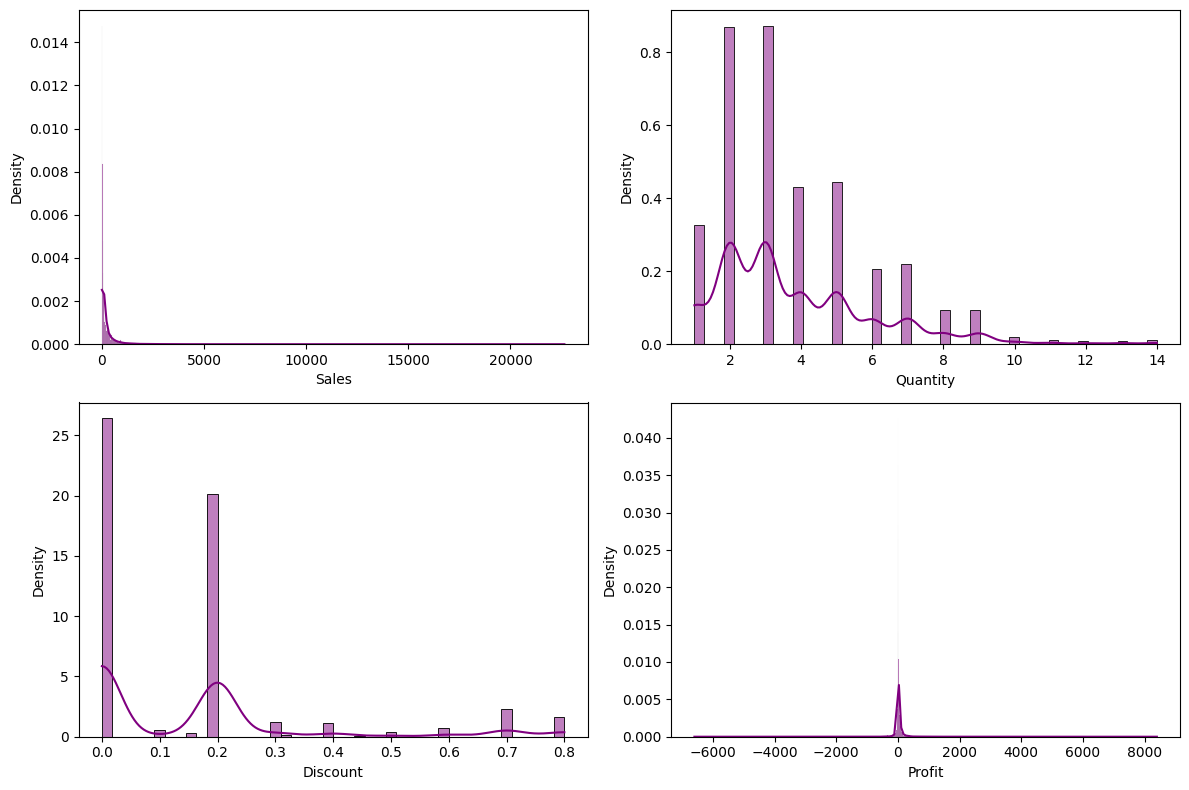

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

variables = numerical_col
for i in range(2):
    for j in range(2):
        sns.histplot(ax=axes[i][j], data=num_variable[variables[i*2 + j]], kde = True,  stat="density", color ='purple')

plt.tight_layout()
plt.show()

####Heatmap Correlation Among Variables

<Axes: >

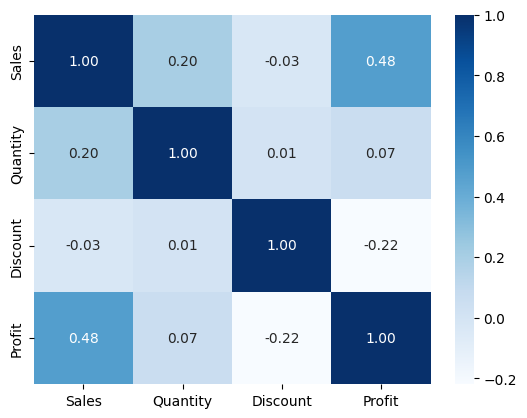

In [ ]:
plt.figsize=((8,6))
sns.heatmap(num_variable.corr(), cmap='Blues', annot=True, fmt='.2f')


#### Summation Table

Table of Sales, Qty, Discount, vs region, catgeory, sub-catgeory, state

In [ ]:
df_grp_region = data.groupby(['Region']).sum()
warnings.filterwarnings("ignore")
df_grp_region

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725214.6645,12264,350.20,108345.5009


In [ ]:
df_grp_cat = data.groupby(['Category']).sum()
warnings.filterwarnings("ignore")
df_grp_cat

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,18451.2728
Office Supplies,718803.8720,22904,947.80,122417.8528
Technology,836154.0330,6939,244.40,145454.9481


In [ ]:
df_grp_segment = data.groupby(['Segment']).sum()
warnings.filterwarnings("ignore")
df_grp_segment


,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161158e+06,19519,820.91,134046.2612
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [ ]:
def thousand_num(x) :
  thousand_num = numerize.numerize(x['Sales'])
  return thousand_num

In [ ]:
df_grp_segment['Sales_K'] = df_grp_segment.apply(lambda x: thousand_num(x), axis=1)
df_grp_segment = df_grp_segment.drop(['Sales'], axis = 1)
df_grp_segment

,Quantity,Discount,Profit,Sales_K
Segment,,,,
Consumer,19519,820.91,134046.2612,1.16M
Corporate,11608,477.85,91979.1340,706.15K
Home Office,6744,262.33,60298.6785,429.65K


In [ ]:
df_grp_subcat = data.groupby(['Sub-Category']).sum()
warnings.filterwarnings("ignore")
df_grp_subcat

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107289.0010,1727,77.60,18065.0574
Art,27118.7920,3000,59.60,6527.7870
Binders,203412.7330,5974,567.00,30221.7633
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,328449.1030,2356,105.00,26590.1663
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


#### Barchart

[]

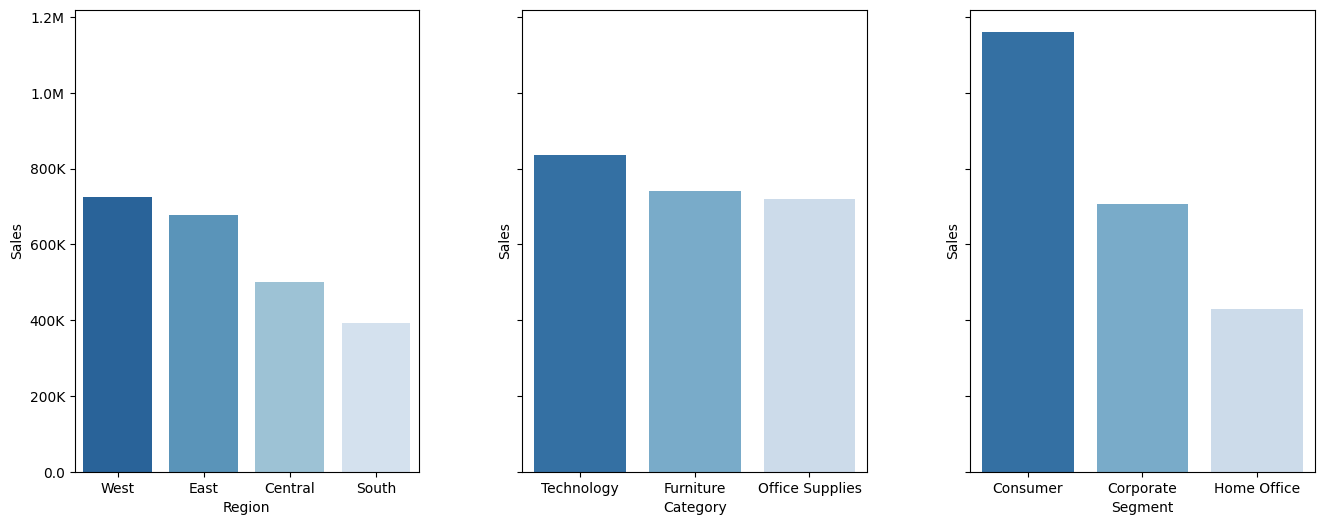

In [ ]:
#Next, observe sales, quantity, discount, profit for each region, category, segment, sub-category state

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey = True)
plt.subplots_adjust(wspace=0.3)


#Total sales by region, category, segment, sub-category, and state
df_region_sales = data.groupby(['Region']).sum()
df_region_sales .reset_index(inplace=True)
df_region_sales .sort_values(by=['Sales'], inplace=True, ascending=False)
reg_chart = sns.barplot(ax = axes[0], x='Region', y='Sales', data=df_region_sales, palette='Blues_r')


df_numeric = data.groupby(['Category']).sum()
df_numeric.reset_index(inplace=True)
cat_chart = df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(ax = axes[1], x='Category', y='Sales', data=df_numeric, palette='Blues_r')


df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
segment_chart = sns.barplot(x='Segment', y='Sales', data=df_numeric, palette='Blues_r')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}K'.format(x/1000) if 1000 < x < 1000000 else '{:1.1f}M'.format(x/1000000) if x >= 1000000 else x for x in current_values])



<Axes: xlabel='Segment', ylabel='Sales'>

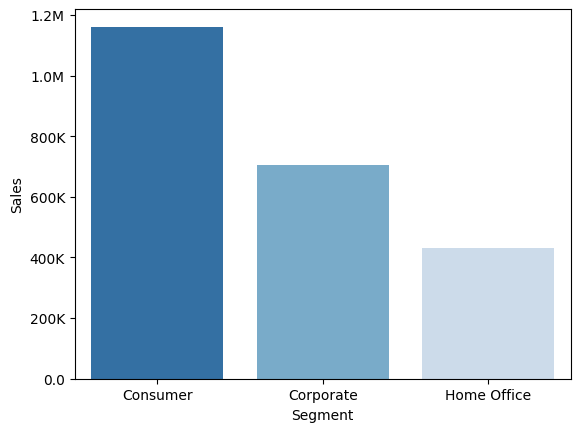

In [ ]:
df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sales_chart = sns.barplot(x='Segment', y='Sales', data=df_numeric, palette='Blues_r')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}K'.format(x/1000) if 1000 < x < 1000000 else '{:1.1f}M'.format(x/1000000) if x >= 1000000 else x for x in current_values])
sales_chart

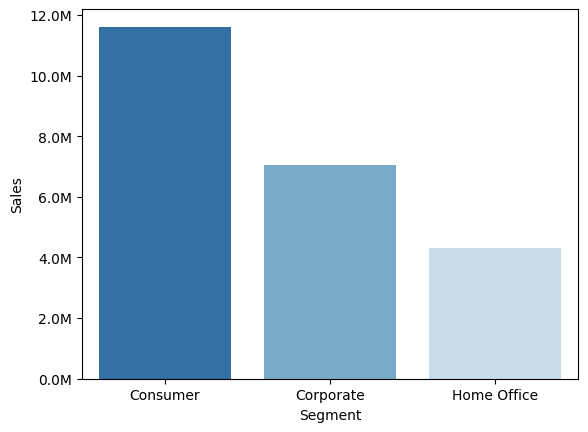

In [ ]:
df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
chart = sns.barplot(x='Segment', y='Sales', data=df_numeric, palette='Blues_r')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.1f}M'.format(x/100000) for x in current_values])
chart = sns.barplot(x='Segment', y='Sales', data=df_numeric, palette='Blues_r')


<Axes: xlabel='Sales', ylabel='Sub-Category'>

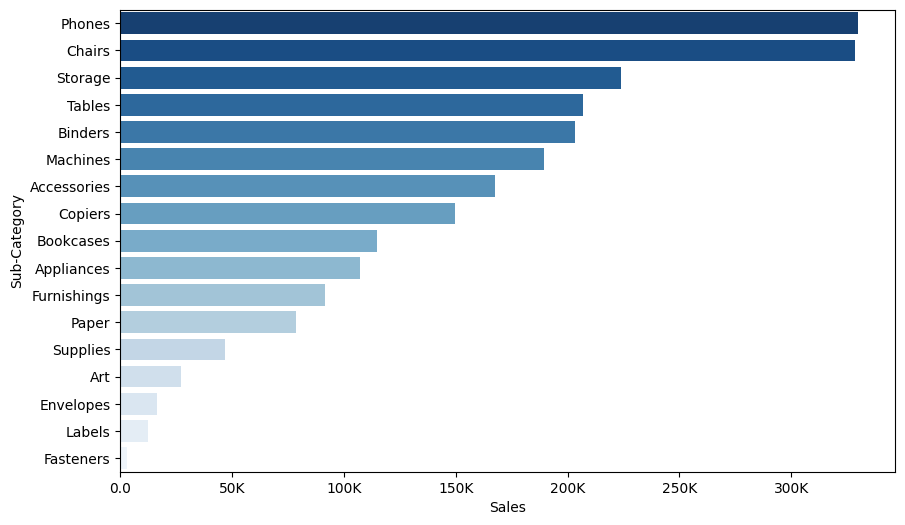

In [ ]:
fig = plt.subplots(figsize= (10,6))

df_numeric = data.groupby(['Sub-Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
chart = sns.barplot(y='Sub-Category', x='Sales', data=df_numeric, palette='Blues_r')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:1.0f}K'.format(x/1000) if 1000 < x < 1000000 else '{:1.1f}M'.format(x/1000000) if x >= 1000000 else x for x in current_values])
chart

<Axes: xlabel='Sales', ylabel='State'>

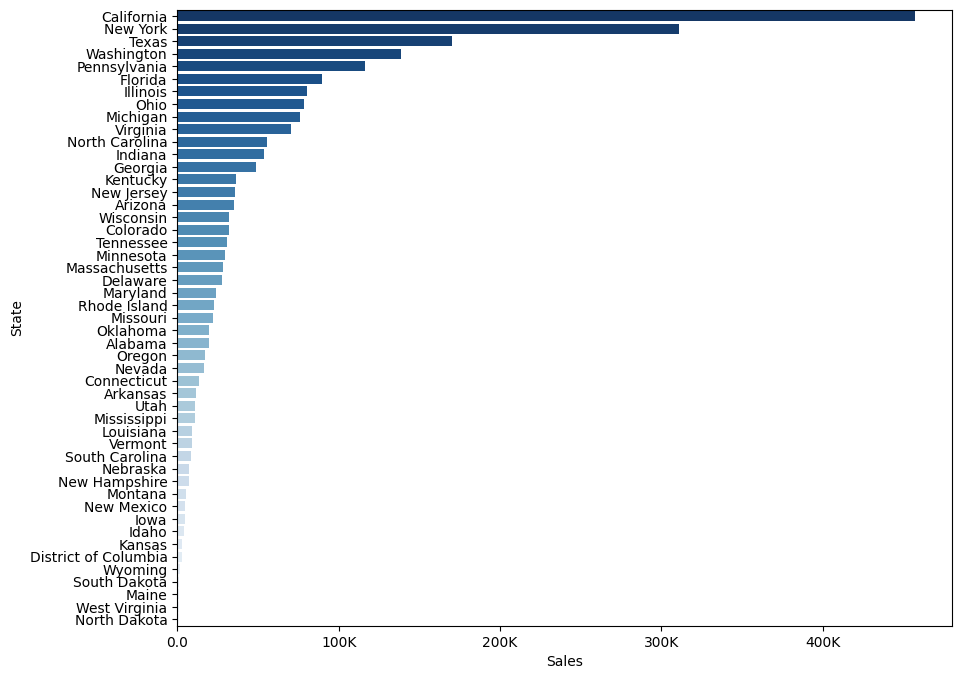

In [ ]:
fig = plt.subplots(figsize= (10,8))

df_numeric = data.groupby(['State']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
chart = sns.barplot(y='State', x='Sales', data=df_numeric, palette='Blues_r')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:1.0f}K'.format(x/1000) if 1000 < x < 1000000 else '{:1.1f}M'.format(x/1000000) if x >= 1000000 else x for x in current_values])
chart

<Axes: xlabel='Segment', ylabel='Profit'>

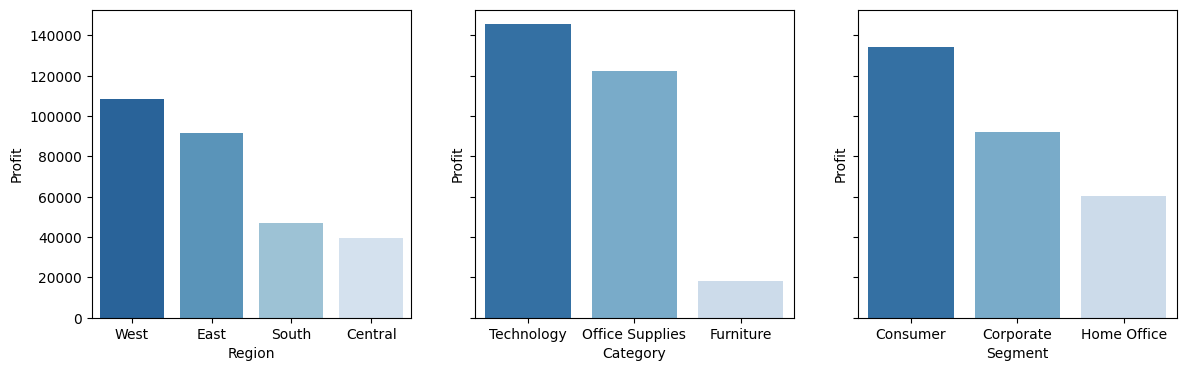

In [ ]:
#Next, observe sales, quantity, discount, profit for each region, category, segment, sub-category state
fig, axes = plt.subplots(1, 3, figsize= (14,4), sharey = True)

#Total Profit by region, category, segment, sub-category, and state
df_numeric = data.groupby(['Region']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[0], x='Region', y='Profit', data=df_numeric, palette='Blues_r')


df_numeric = data.groupby(['Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[1], x='Category', y='Profit', data=df_numeric, palette='Blues_r')

df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[2], x='Segment', y='Profit', data=df_numeric, palette='Blues_r')

<Axes: xlabel='Profit', ylabel='Sub-Category'>

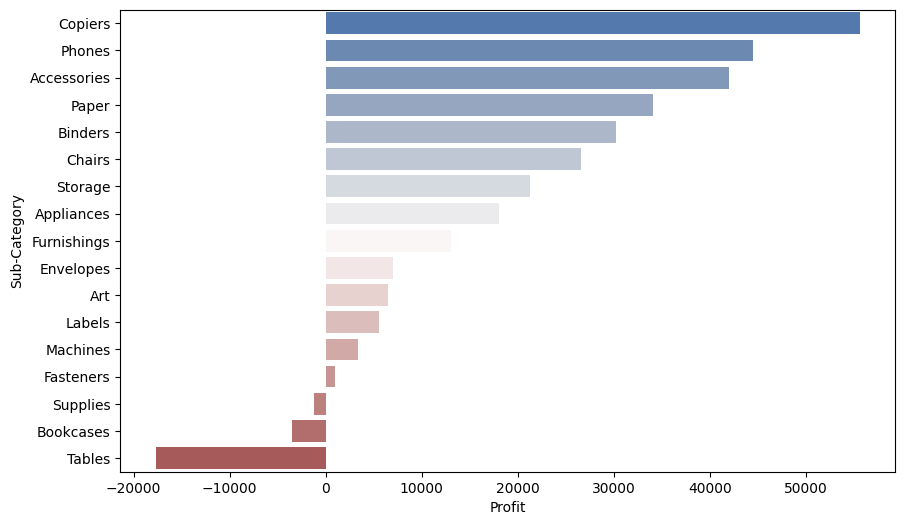

In [ ]:
fig = plt.subplots(figsize= (10,6))

df_numeric = data.groupby(['Sub-Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(y='Sub-Category', x='Profit', data=df_numeric, palette='vlag')

<Axes: xlabel='Profit', ylabel='State'>

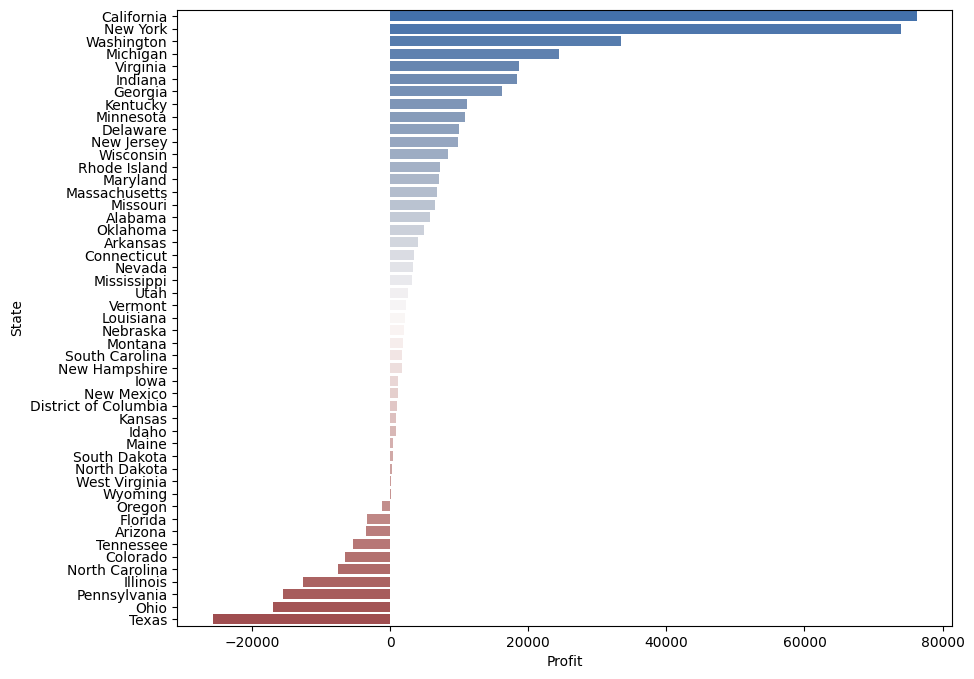

In [ ]:
fig = plt.subplots(figsize= (10,8))

df_numeric = data.groupby(['State']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(y='State', x='Profit', data=df_numeric, palette='vlag')

####Creating maps

In [ ]:
pip install Fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.1 MB/s eta 0:00:00


In [ ]:
pip install GDAL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install RTree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00


In [ ]:
pip install Shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install GeoPandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 78.8 MB/s eta 0:00:00


In [ ]:
import geopandas
from shapely.geometry import Point
import missingno as msn

In [ ]:
#file_path = ''

In [ ]:
# Getting to know GEOJSON file:
state = geopandas.read_file("/content/drive/My Drive/gz_2010_us_040_00_500k.json")
state

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."
5,0400000US34,34,New Jersey,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656..."
6,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ..."
7,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ..."
8,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ..."
9,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809..."


<Axes: >

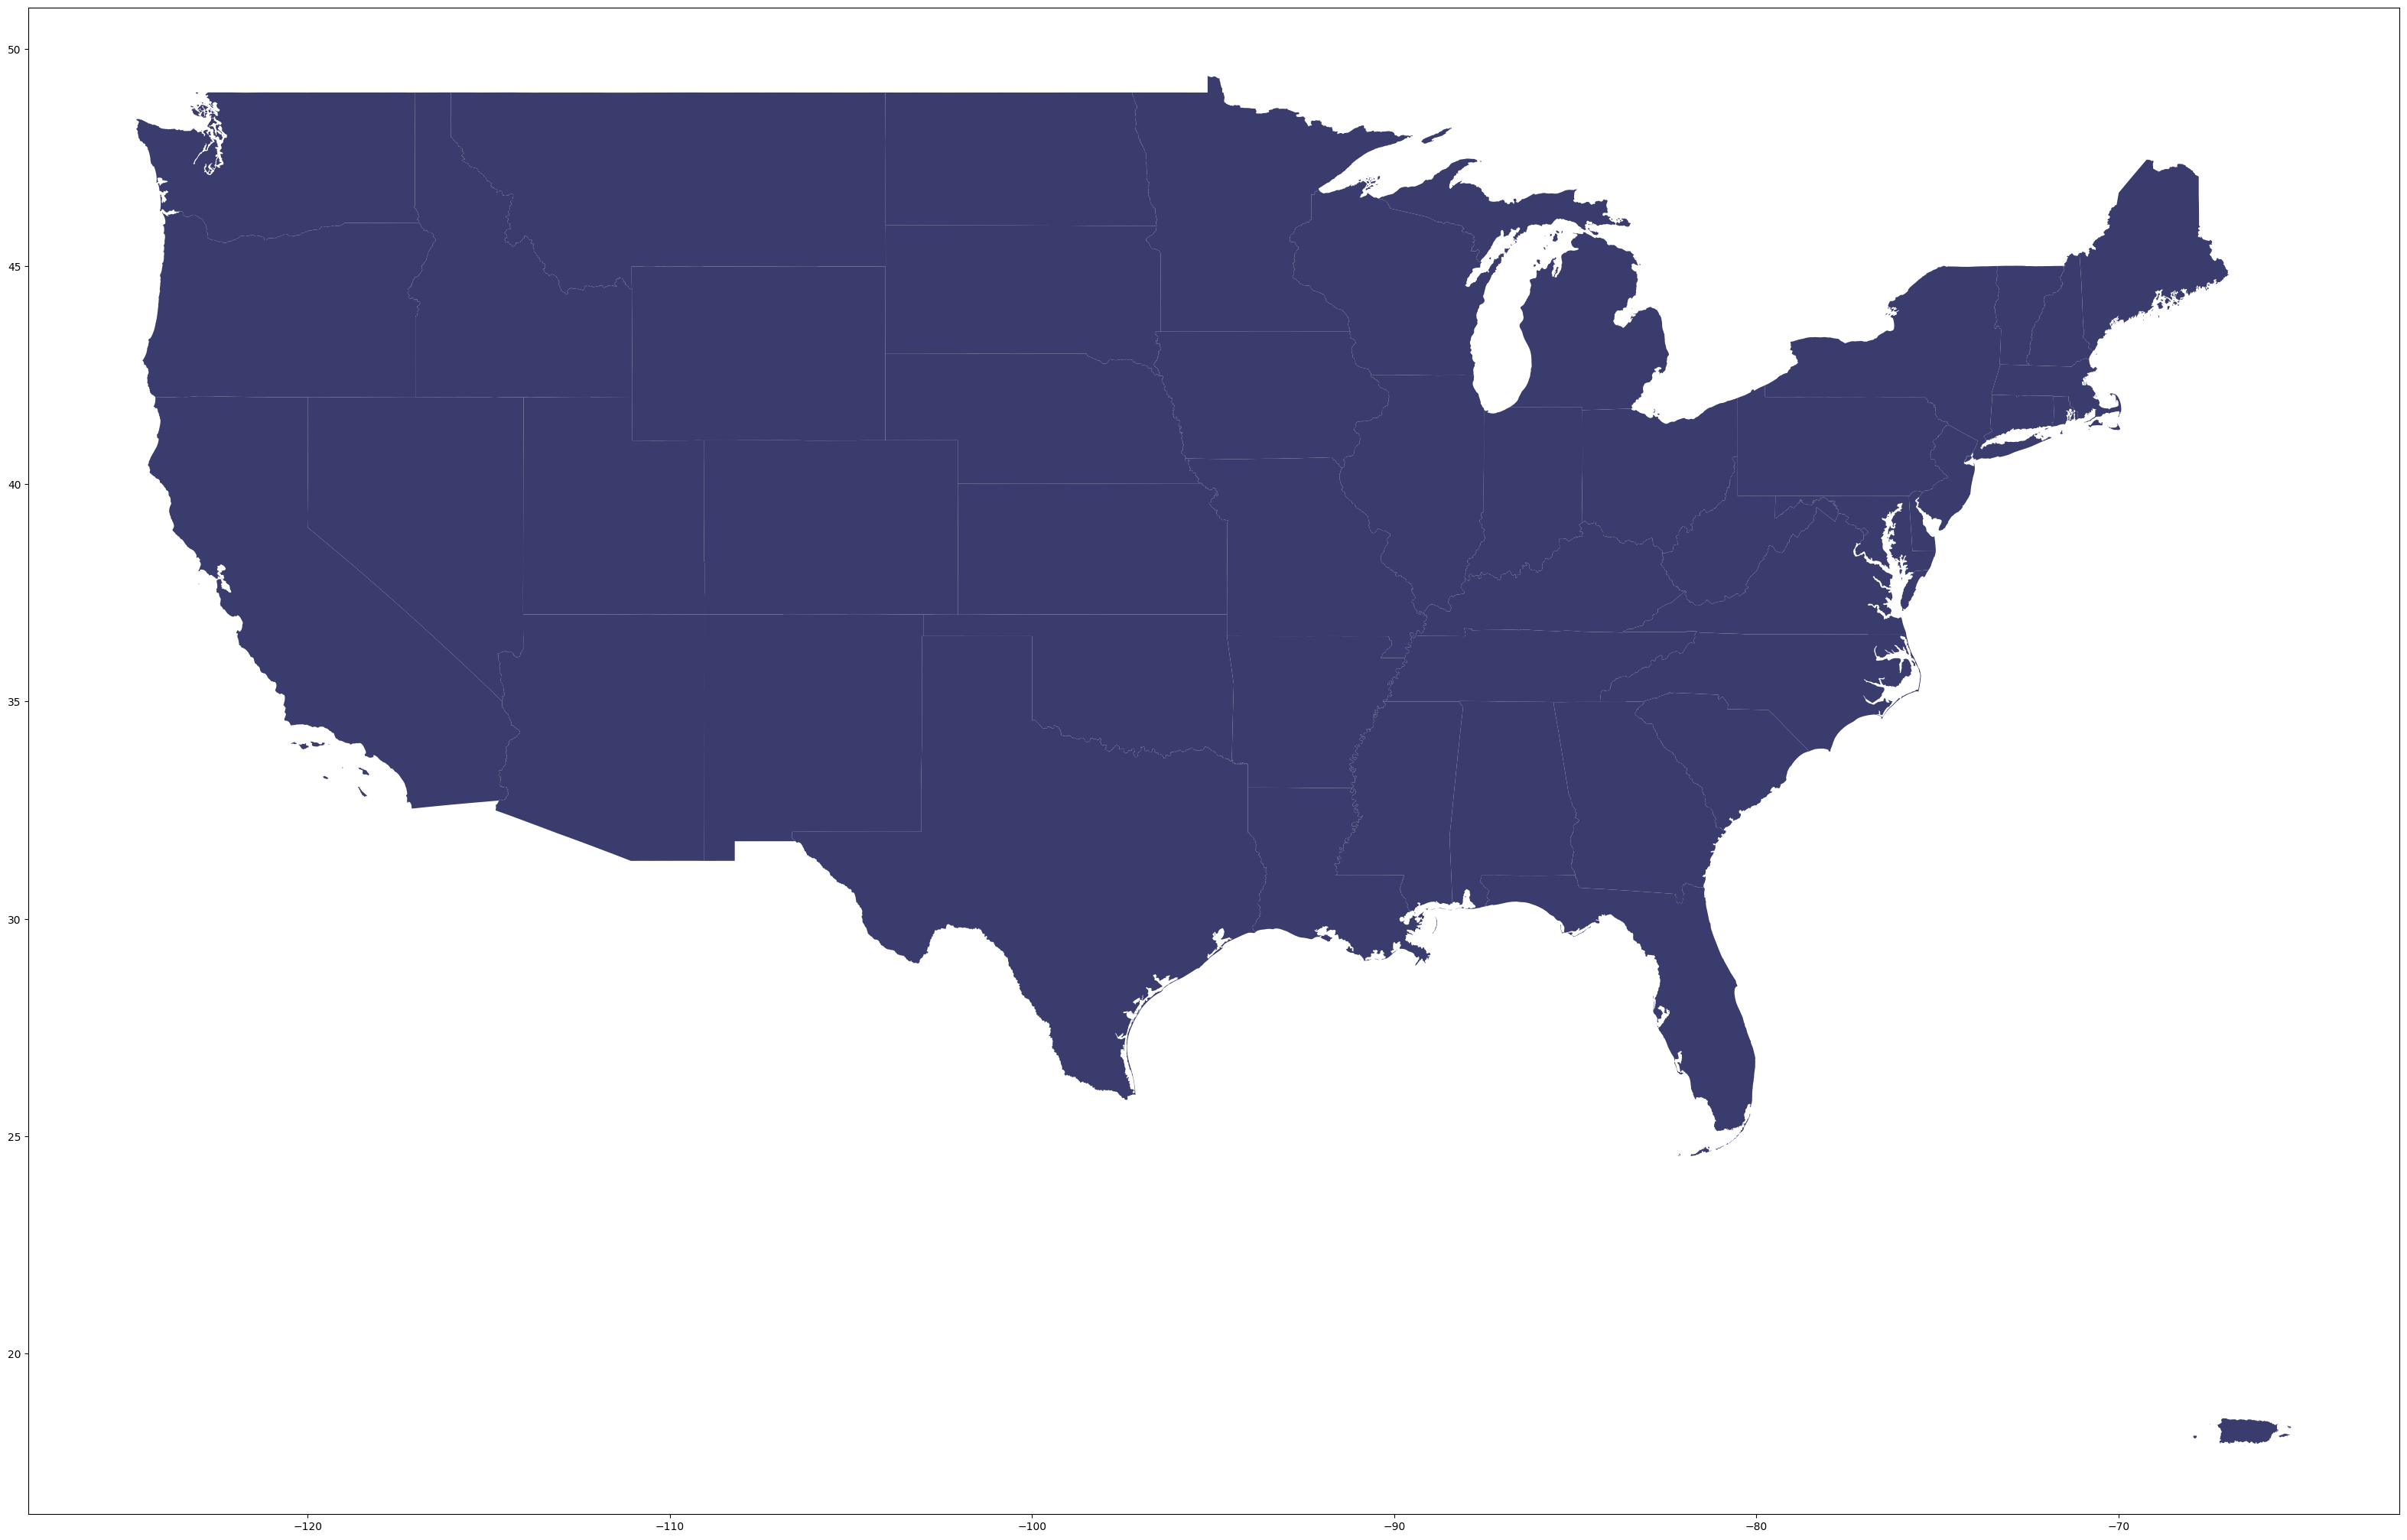

In [ ]:
maps = state[state['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(40,30), color='#3B3C6E')
maps

In [ ]:
df_grp_state = data.groupby(['State']).sum()
df_grp_state

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.6400,256,0.00,5786.8253
Arizona,35282.0010,862,68.00,-3427.9246
Arkansas,11678.1300,240,0.00,4008.6871
California,457444.4715,7665,145.60,76308.4391
Colorado,32108.1180,693,57.60,-6527.8579
Connecticut,13384.3570,281,0.60,3511.4918
Delaware,27451.0690,367,0.60,9977.3748
District of Columbia,2865.0200,40,0.00,1059.5893
Florida,89473.7080,1379,114.65,-3399.3017


In [ ]:
len(df_grp_state)

49

In [ ]:
df_state_sales = df_grp_state[['Sales']]
df_state_sales

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457444.4715
Colorado,32108.1180
Connecticut,13384.3570
Delaware,27451.0690
District of Columbia,2865.0200
Florida,89473.7080


In [ ]:
merged = pd.merge(left = state,right = df_grp_state, left_on = 'NAME', right_on = 'State', how = 'left')

In [ ]:
merged

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,Sales,Quantity,Discount,Profit
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",1270.5300,35.0,0.00,454.4862
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",28634.4340,491.0,2.10,6785.5016
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",76269.6140,946.0,1.80,24463.1876
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",5589.3520,56.0,1.00,1833.3285
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",16729.1020,168.0,2.40,3316.7659
5,0400000US34,34,New Jersey,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656...",35764.3120,454.0,0.60,9772.9138
6,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",310876.2710,4224.0,62.40,74038.5486
7,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...",55603.1640,983.0,70.60,-7490.9122
8,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...",78258.1360,1759.0,152.40,-16971.3766
9,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809...",116511.9140,2153.0,192.90,-15559.9603


In [ ]:
merged= merged.dropna()

In [ ]:
merged.columns

Index(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
merged

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,Sales,Quantity,Discount,Profit
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",1270.5300,35.0,0.00,454.4862
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",28634.4340,491.0,2.10,6785.5016
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",76269.6140,946.0,1.80,24463.1876
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",5589.3520,56.0,1.00,1833.3285
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",16729.1020,168.0,2.40,3316.7659
5,0400000US34,34,New Jersey,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656...",35764.3120,454.0,0.60,9772.9138
6,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",310876.2710,4224.0,62.40,74038.5486
7,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...",55603.1640,983.0,70.60,-7490.9122
8,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...",78258.1360,1759.0,152.40,-16971.3766
9,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809...",116511.9140,2153.0,192.90,-15559.9603


In [ ]:
merged_sales = merged[['NAME','geometry','Sales']]
merged_sales

,NAME,geometry,Sales
0,Maine,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",1270.5300
1,Massachusetts,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",28634.4340
2,Michigan,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...",76269.6140
3,Montana,"POLYGON ((-104.05770 44.99743, -104.25015 44.9...",5589.3520
4,Nevada,"POLYGON ((-114.05060 37.00040, -114.04999 36.9...",16729.1020
5,New Jersey,"POLYGON ((-75.52684 39.65571, -75.52634 39.656...",35764.3120
6,New York,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",310876.2710
7,North Carolina,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...",55603.1640
8,Ohio,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...",78258.1360
9,Pennsylvania,"POLYGON ((-75.41504 39.80179, -75.42804 39.809...",116511.9140


In [ ]:
merged_sales = merged_sales.dropna()

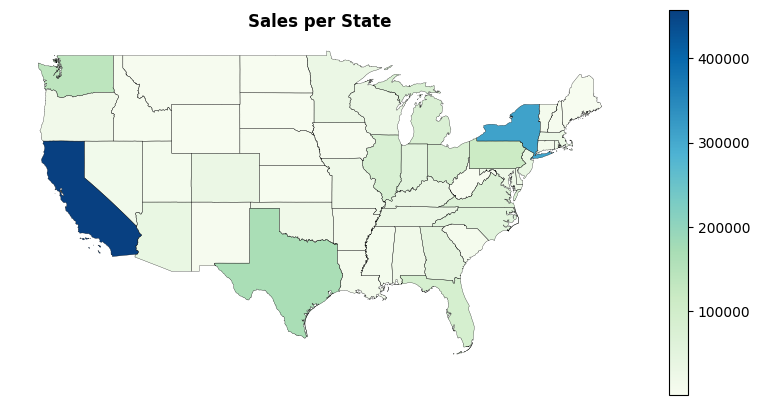

In [ ]:
ax = merged.boundary.plot(edgecolor = 'black', linewidth = 0.2, figsize=(10,5))
merged.plot(ax= ax, column = 'Sales', legend = True, cmap='GnBu')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
  ax.spines[edge].set_visible(False)

ax.set_title('Sales per State', size = 12, weight = 'bold')


plt.show()


#### Chloropete map

In [ ]:
json_2 = geopandas.read_file("/content/drive/My Drive/us-states.json")
json_2

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683..."
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787..."


<Axes: >

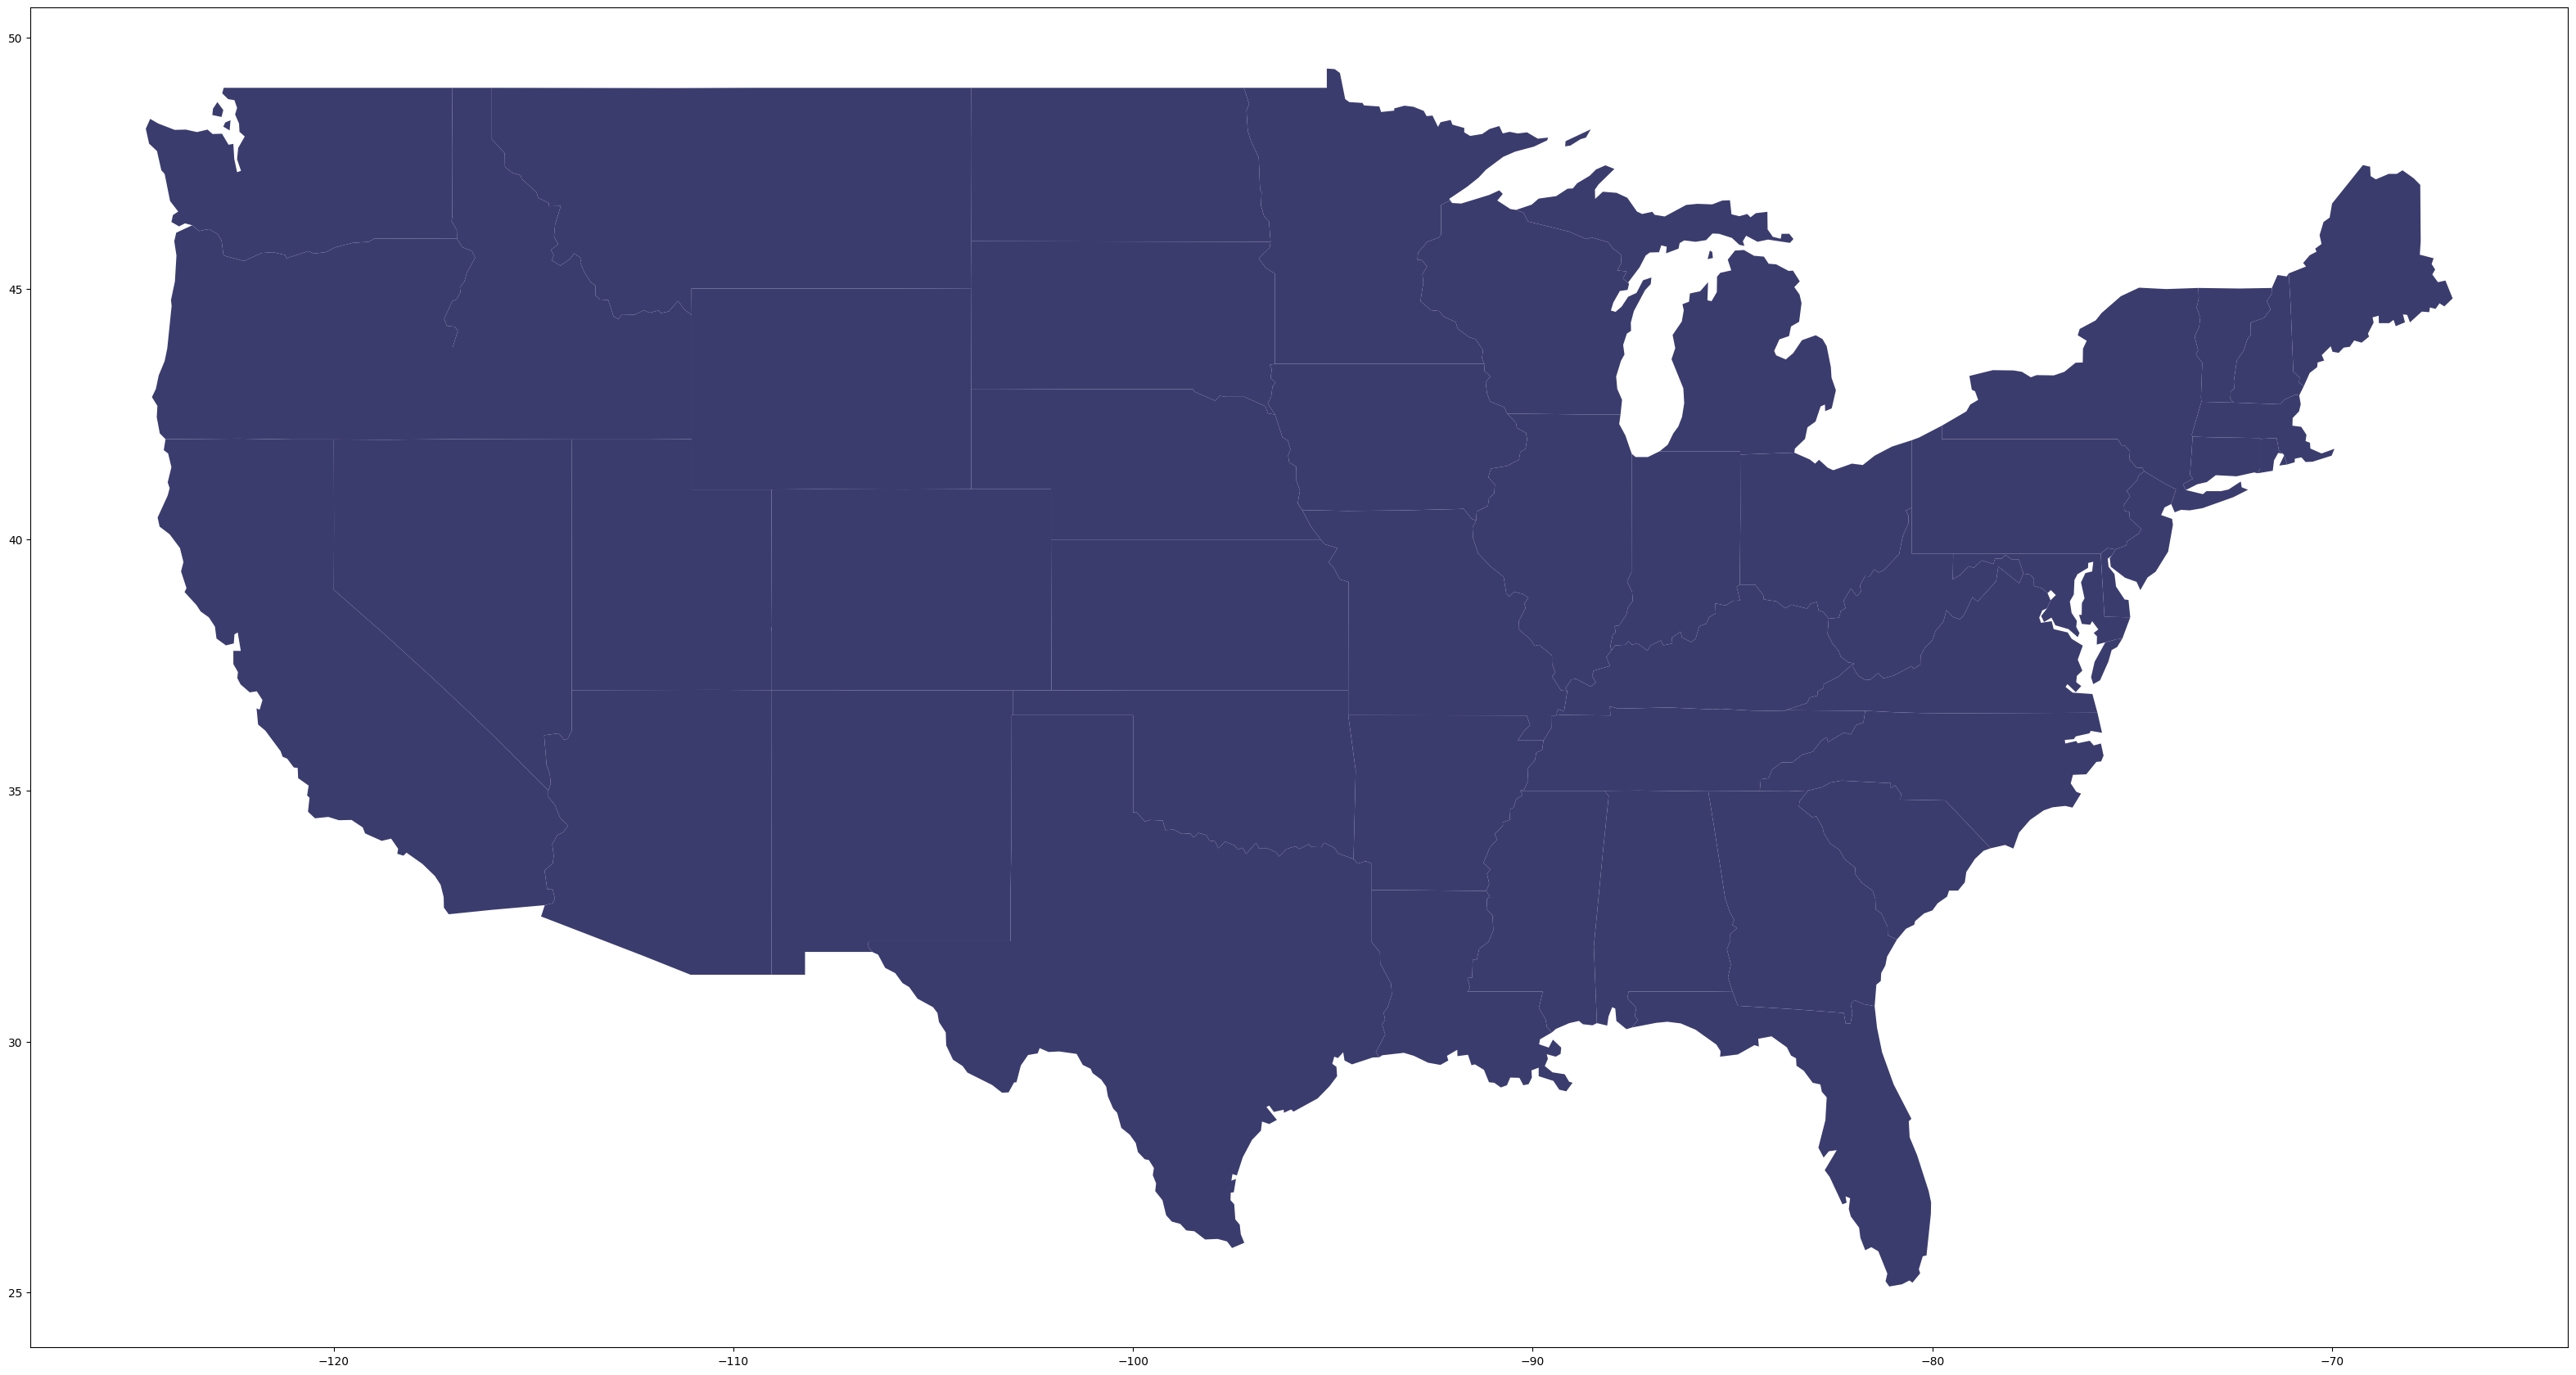

In [ ]:
maps_2 = json_2[json_2['name'].isin(['Alaska','Hawaii']) == False].plot(figsize=(40,30), color='#3B3C6E')
maps_2

In [ ]:
merged_2 = pd.merge(left = json_2,right = df_grp_state, left_on = 'name', right_on = 'State', how = 'left')
merged_2

,id,name,geometry,Sales,Quantity,Discount,Profit
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",19510.6400,256.0,0.00,5786.8253
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",NaN,NaN,NaN,NaN
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",35282.0010,862.0,68.00,-3427.9246
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",11678.1300,240.0,0.00,4008.6871
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",457444.4715,7665.0,145.60,76308.4391
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",32108.1180,693.0,57.60,-6527.8579
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",13384.3570,281.0,0.60,3511.4918
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",27451.0690,367.0,0.60,9977.3748
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",89473.7080,1379.0,114.65,-3399.3017
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",49095.8400,705.0,0.00,16250.0433


In [ ]:
merged_2.columns

Index(['id', 'name', 'geometry', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=merged_2['id'], # Spatial coordinates
    z = merged_2['Sales'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "USD",
    text=merged_2[['id','name','Sales']],

))

fig.update_layout(
    title_text = 'Sales By State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()